In [ ]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime
import cv2
import os
import zipfile
import shutil
from glob import glob

import tensorflow.keras.utils as utils

from tensorflow.keras.applications import Xception, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
ROOT_DIR = '/content'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'car_part')
TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train')
TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'test')

In [ ]:
#### Colab

from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
print('mount is completed')

data_path = "/content/gdrive/MyDrive/"

shutil.copy(os.path.join('/content/gdrive/My Drive/FINAL PROJECT/', 'car_part.zip'), ROOT_DIR)

if os.path.exists(DATA_ROOT_DIR):
    shutil.rmtree(DATA_ROOT_DIR)

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'car_part.zip'), 'r') as target_file:
    target_file.extractall(DATA_ROOT_DIR)

Mounted at /content/gdrive
mount is completed


In [ ]:
label_name_list = os.listdir(DATA_ROOT_DIR)


for i in range(len(label_name_list)):

    path = os.path.join(DATA_ROOT_DIR, os.listdir(DATA_ROOT_DIR)[i])
    print(os.listdir(DATA_ROOT_DIR)[i], len(os.listdir(path)))

train 12
test 12


# test dir 및 하위 디렉토리 생성

In [ ]:
# if not os.path.exists(TEST_DATA_ROOT_DIR):
#     os.mkdir(TEST_DATA_ROOT_DIR)
#     print(TEST_DATA_ROOT_DIR + ' is created')
# else:
#     print(TEST_DATA_ROOT_DIR + ' is already extists')

# for label_name in label_name_list:
#     if not os.path.exists(os.path.join(TEST_DATA_ROOT_DIR, label_name)):
#         os.mkdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))
#         print(os.path.join(TEST_DATA_ROOT_DIR, label_name) + ' is created')
#     else:
#         print(os.path.join(TEST_DATA_ROOT_DIR, label_name) + ' is already extists')


## 파일 개수 확인, 셔플 이동

In [ ]:

# MOVE_RATIO = 0.2
# move_num = 0

# for label_name in label_name_list:
#     src = os.path.join(DATA_ROOT_DIR, label_name)
#     dst = os.path.join(TEST_DATA_ROOT_DIR, label_name)

#     train_data_file_list = os.listdir(src)

#     print("-----------------------------------------")
#     print("total [%s] data file nums => [%s]"%(label_name, len(train_data_file_list)))

#     np.random.shuffle(train_data_file_list)
#     print("train data shuffle is done!!!")

#     split_num = int(MOVE_RATIO * len(train_data_file_list))
#     print("split nums =>", split_num)

#     test_data_file_list = train_data_file_list[0:split_num]

#     move_nums = 0
#     for test_data_file in test_data_file_list:
#         shutil.move(os.path.join(src, test_data_file),
#                    os.path.join(dst, test_data_file))

#         move_num = move_num + 1
#     print("total mov num =>", move_num)
#     print("-----------------------------------------")

# 폴더 train으로 안묶어서 묶어주기

In [ ]:
# # for_train_list = os.listdir(DATA_ROOT_DIR)

# train_list = ['Separated', 'Breakaged', 'Crush', 'Scratched']
# train_list

In [ ]:
# if not os.path.exists(TRAIN_DATA_ROOT_DIR):
#     os.mkdir(TRAIN_DATA_ROOT_DIR)
#     print(TRAIN_DATA_ROOT_DIR + ' is created')
# else:
#     print(TRAIN_DATA_ROOT_DIR + ' is already extists')

# for label_name in train_list:
#     if not os.path.exists(os.path.join(TRAIN_DATA_ROOT_DIR, label_name)):
#         os.mkdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))
#         print(os.path.join(TRAIN_DATA_ROOT_DIR, label_name) + ' is created')
#     else:
#         print(os.path.join(TRAIN_DATA_ROOT_DIR, label_name) + ' is already extists')

In [ ]:
print(TRAIN_DATA_ROOT_DIR)
print(DATA_ROOT_DIR)

/content/car_part/train
/content/car_part


In [ ]:
# for label_name in train_list:
#     shutil.move(os.path.join(DATA_ROOT_DIR, label_name), os.path.join(TRAIN_DATA_ROOT_DIR, label_name))

# 경로 다시 보고 잡기

In [ ]:
# ROOT_DIR = '/content'
# DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'car_damaged/damage_part')
# TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train')
# TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'test')
# TRAIN_DATA_ROOT_DIR

## ImageDataGenerator를 이용하여 데이터 불러오기

In [ ]:
IMAGE_SIZE = 224

train_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_data_gen = ImageDataGenerator(rescale=1./255)



train_generator = train_data_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                class_mode = 'sparse', shuffle = True,
                                                subset='training')

val_generator = train_data_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                class_mode = 'sparse', shuffle = True,
                                                subset='validation')

test_generator = test_data_gen.flow_from_directory(directory=TEST_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                class_mode = 'sparse', shuffle = True)

Found 1537 images belonging to 12 classes.
Found 377 images belonging to 12 classes.
Found 472 images belonging to 12 classes.


In [ ]:
print(train_generator.class_indices)
print(train_generator.num_classes)

{'Bonnet': 0, 'Bumper': 1, 'Car_roof': 2, 'Front_fender': 3, 'Headlights': 4, 'Rear_lamp': 5, 'Rocker_panel': 6, 'Side_mirror': 7, 'Trunk lid': 8, 'Wheel': 9, 'door': 10, 'rear fender': 11}
12


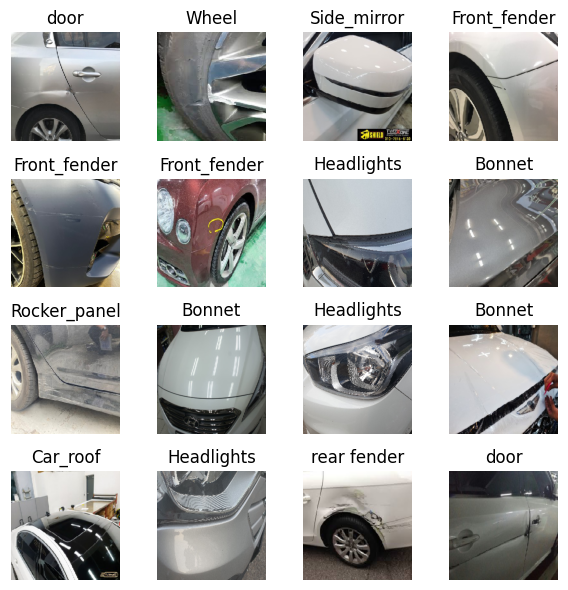

In [ ]:
### 16 장의 이미지 확인


img, label = train_generator.next()
img = img[:16]
label = label[:16]

class_name = {0: 'Bonnet', 1: 'Bumper', 2: 'Car_roof', 3: 'Front_fender', 4: 'Headlights', 5: 'Rear_lamp', 6: 'Rocker_panel', 7: 'Side_mirror', 8: 'Trunk lid', 9: 'Wheel', 10: 'door', 11: 'rear fender'}

plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(4, 4, i+1)
    plt.title(class_name[int(label[i])])
    plt.imshow(img[i])
    plt.axis('off')
plt.tight_layout()


# 모델링 테스트

## (1) CCP CCP F D D

In [ ]:
model = Sequential()

### 1st layer
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=32,
                 kernel_size=3,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
model.add(Dropout(0.25))

### 2nd layer
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
model.add(Dropout(0.25))

# F

model.add(Flatten())

# hidden layer

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.6))

model.add(Dense(12, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=1e-5),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      36928     
                                                      

In [ ]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=30, validation_data=val_generator, callbacks=[tf_stop]) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")
# plt.show()

plt.subplot(1, 2, 2)

plt.title("acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.grid()

plt.plot(result.history["accuracy"], label="train_acc")
plt.plot(result.history["val_accuracy"], label="validation_acc")
plt.legend(loc="best")
plt.show()

# 모델링 테스트

## (1) CCP CCP F D D

In [ ]:
base_model = MobileNet(weights='imagenet',
                       include_top=False,
                       input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) # include_top 모델에 분류기 학습기 같이 가져옴. false는 학습기는 안가져온다. 따로 추가 필요.
#base_model.summary()

model = Sequential()  # Fc계층 만들어주기

model.add(base_model)
model.add(Flatten())
model.add(Dense(32, activation="relu"))  # 은닉층
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=1e-5),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 50176)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                1605664   
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 12)                396       
                                                                 
Total params: 4,834,924
Trainable params: 4,813,036
Non-trainable params: 21,888
_______________________________________

In [ ]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=50, validation_data=val_generator) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/50
49/49 [==============================] - 57s 1s/step - loss: 0.4116 - accuracy: 0.8354 - val_loss: 0.6726 - val_accuracy: 0.7905
Epoch 2/50
49/49 [==============================] - 54s 1s/step - loss: 0.3899 - accuracy: 0.8536 - val_loss: 0.6852 - val_accuracy: 0.7878
Epoch 3/50
49/49 [==============================] - 63s 1s/step - loss: 0.4063 - accuracy: 0.8380 - val_loss: 0.6652 - val_accuracy: 0.7878
Epoch 4/50
49/49 [==============================] - 54s 1s/step - loss: 0.3561 - accuracy: 0.8627 - val_loss: 0.6589 - val_accuracy: 0.7825
Epoch 5/50
49/49 [==============================] - 55s 1s/step - loss: 0.3704 - accuracy: 0.8634 - val_loss: 0.6717 - val_accuracy: 0.8011
Epoch 6/50
49/49 [==============================] - 62s 1s/step - loss: 0.3802 - accuracy: 0.8478 - val_loss: 0.6751 - val_accuracy: 0.7984
Epoch 7/50
49/49 [==============================] - 53s 1s/step - loss: 0.3602 - accuracy: 0.8673 - val_loss: 0.6343 - val_accuracy: 0.7958
Epoch 8/50
49/49 [==

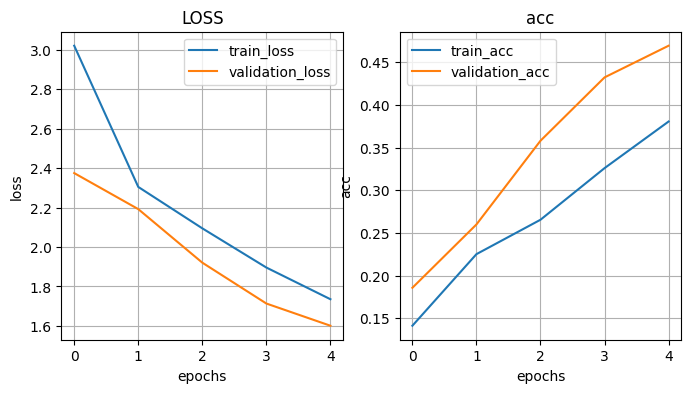

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")
# plt.show()

plt.subplot(1, 2, 2)

plt.title("acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.grid()

plt.plot(result.history["accuracy"], label="train_acc")
plt.plot(result.history["val_accuracy"], label="validation_acc")
plt.legend(loc="best")
plt.show()

# 다음 모델 테스트

## InceptionV3

In [ ]:
base_model = InceptionV3(weights='imagenet',
                       include_top=False,
                       input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) # include_top 모델에 분류기 학습기 같이 가져옴. false는 학습기는 안가져온다. 따로 추가 필요.
#base_model.summary()

model = Sequential()  # Fc계층 만들어주기

model.add(base_model)
model.add(Flatten())
model.add(Dense(32, activation="relu"))  # 은닉층
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=1e-5),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 32)                1638432   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                396       
                                                                 
Total params: 23,441,612
Trainable params: 23,407,180
Non-trainable params: 34,432
________________________________________

In [ ]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=[tf_stop]) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/50
49/49 [==============================] - 112s 1s/step - loss: 2.5095 - accuracy: 0.1269 - val_loss: 2.2917 - val_accuracy: 0.1857
Epoch 2/50
49/49 [==============================] - 53s 1s/step - loss: 2.2416 - accuracy: 0.2238 - val_loss: 2.0514 - val_accuracy: 0.3395
Epoch 3/50
49/49 [==============================] - 64s 1s/step - loss: 1.9945 - accuracy: 0.2954 - val_loss: 1.7928 - val_accuracy: 0.4111
Epoch 4/50
49/49 [==============================] - 54s 1s/step - loss: 1.7984 - accuracy: 0.3709 - val_loss: 1.6407 - val_accuracy: 0.4934
Epoch 5/50
49/49 [==============================] - 53s 1s/step - loss: 1.6276 - accuracy: 0.4372 - val_loss: 1.5103 - val_accuracy: 0.5013
Epoch 6/50
49/49 [==============================] - 55s 1s/step - loss: 1.4185 - accuracy: 0.4867 - val_loss: 1.3943 - val_accuracy: 0.5756
Epoch 7/50
49/49 [==============================] - 54s 1s/step - loss: 1.2834 - accuracy: 0.5543 - val_loss: 1.2677 - val_accuracy: 0.6154
Epoch 8/50
49/49 [=

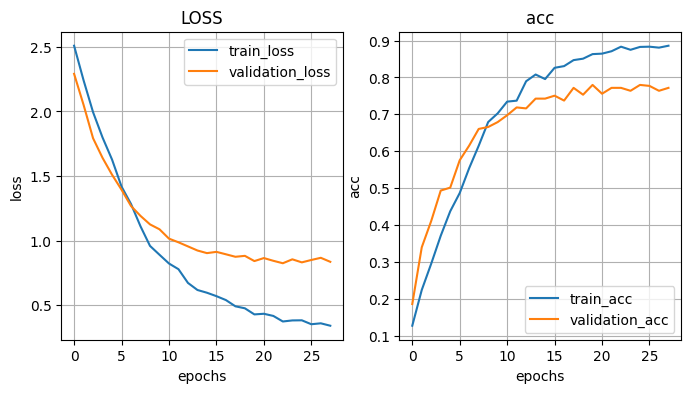

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")
# plt.show()

plt.subplot(1, 2, 2)

plt.title("acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.grid()

plt.plot(result.history["accuracy"], label="train_acc")
plt.plot(result.history["val_accuracy"], label="validation_acc")
plt.legend(loc="best")
plt.show()

In [ ]:
model.evaluate(test_generator)

15/15 [==============================] - 19s 1s/step - loss: 0.7184 - accuracy: 0.7945


[0.7183961272239685, 0.7944915294647217]

# 다음 모델 테스트

## InceptionV3 -2

In [ ]:
base_model = InceptionV3(weights='imagenet',
                       include_top=False,
                       input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) # include_top 모델에 분류기 학습기 같이 가져옴. false는 학습기는 안가져온다. 따로 추가 필요.
#base_model.summary()

model = Sequential()  # Fc계층 만들어주기

model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation="relu"))  # 은닉층
model.add(Dropout(0.65))

model.add(Dense(12, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=2e-5),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                3276864   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                780       
                                                                 
Total params: 25,080,428
Trainable params: 25,045,996
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=[tf_stop], batch_size=30) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/50
49/49 [==============================] - 93s 1s/step - loss: 2.5175 - accuracy: 0.1477 - val_loss: 2.0572 - val_accuracy: 0.2838
Epoch 2/50
49/49 [==============================] - 61s 1s/step - loss: 2.0601 - accuracy: 0.2863 - val_loss: 1.6314 - val_accuracy: 0.4483
Epoch 3/50
49/49 [==============================] - 53s 1s/step - loss: 1.7030 - accuracy: 0.4001 - val_loss: 1.3713 - val_accuracy: 0.5252
Epoch 4/50
49/49 [==============================] - 53s 1s/step - loss: 1.5156 - accuracy: 0.4834 - val_loss: 1.2187 - val_accuracy: 0.5756
Epoch 5/50
49/49 [==============================] - 52s 1s/step - loss: 1.3008 - accuracy: 0.5413 - val_loss: 1.0773 - val_accuracy: 0.6393
Epoch 6/50
49/49 [==============================] - 52s 1s/step - loss: 1.0787 - accuracy: 0.6109 - val_loss: 0.9641 - val_accuracy: 0.6790
Epoch 7/50
49/49 [==============================] - 53s 1s/step - loss: 0.9507 - accuracy: 0.6740 - val_loss: 0.8738 - val_accuracy: 0.7268
Epoch 8/50
49/49 [==

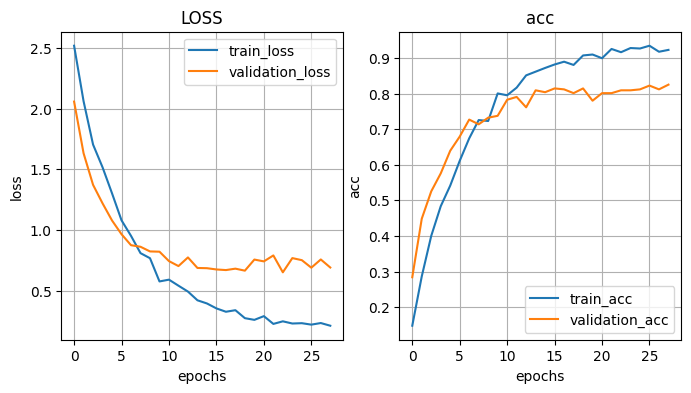

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")
# plt.show()

plt.subplot(1, 2, 2)

plt.title("acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.grid()

plt.plot(result.history["accuracy"], label="train_acc")
plt.plot(result.history["val_accuracy"], label="validation_acc")
plt.legend(loc="best")
plt.show()

In [ ]:
model.evaluate(test_generator)

15/15 [==============================] - 18s 1s/step - loss: 0.8440 - accuracy: 0.8136


[0.8439570069313049, 0.8135592937469482]

# 다음 모델 테스트

## ResNet50

In [ ]:
base_model = ResNet50(weights='imagenet',
                       include_top=False,
                       input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) # include_top 모델에 분류기 학습기 같이 가져옴. false는 학습기는 안가져온다. 따로 추가 필요.
#base_model.summary()

model = Sequential()  # Fc계층 만들어주기

model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation="relu"))  # 은닉층
model.add(Dropout(0.65))

model.add(Dense(12, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=2e-5),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                3276864   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                780       
                                                                 
Total params: 25,080,428
Trainable params: 25,045,996
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=[tf_stop], batch_size=30) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/50
49/49 [==============================] - 93s 1s/step - loss: 2.5175 - accuracy: 0.1477 - val_loss: 2.0572 - val_accuracy: 0.2838
Epoch 2/50
49/49 [==============================] - 61s 1s/step - loss: 2.0601 - accuracy: 0.2863 - val_loss: 1.6314 - val_accuracy: 0.4483
Epoch 3/50
49/49 [==============================] - 53s 1s/step - loss: 1.7030 - accuracy: 0.4001 - val_loss: 1.3713 - val_accuracy: 0.5252
Epoch 4/50
49/49 [==============================] - 53s 1s/step - loss: 1.5156 - accuracy: 0.4834 - val_loss: 1.2187 - val_accuracy: 0.5756
Epoch 5/50
49/49 [==============================] - 52s 1s/step - loss: 1.3008 - accuracy: 0.5413 - val_loss: 1.0773 - val_accuracy: 0.6393
Epoch 6/50
49/49 [==============================] - 52s 1s/step - loss: 1.0787 - accuracy: 0.6109 - val_loss: 0.9641 - val_accuracy: 0.6790
Epoch 7/50
49/49 [==============================] - 53s 1s/step - loss: 0.9507 - accuracy: 0.6740 - val_loss: 0.8738 - val_accuracy: 0.7268
Epoch 8/50
49/49 [==

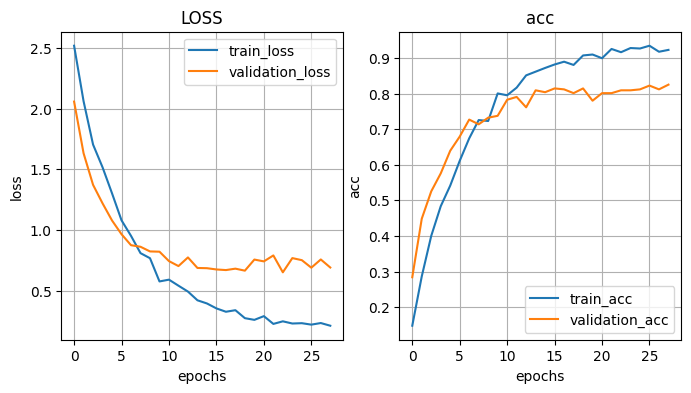

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")
# plt.show()

plt.subplot(1, 2, 2)

plt.title("acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.grid()

plt.plot(result.history["accuracy"], label="train_acc")
plt.plot(result.history["val_accuracy"], label="validation_acc")
plt.legend(loc="best")
plt.show()

In [ ]:
model.evaluate(test_generator)

15/15 [==============================] - 18s 1s/step - loss: 0.8440 - accuracy: 0.8136


[0.8439570069313049, 0.8135592937469482]